In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
df=pd.read_csv('Fraud.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [10]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [34]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [11]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [36]:
df['type'].value_counts()

3    2237500
1    2151495
5    1399284
2     532909
4      41432
Name: type, dtype: int64

In [12]:
df['type']=df['type'].replace({'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'DEBIT':4,'CASH_IN':5})
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,2,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,3,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,4,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [13]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y=df['isFraud']
print(x)
print(y)

         type      amount  oldbalanceOrg  newbalanceOrig
0           1     9839.64      170136.00       160296.36
1           1     1864.28       21249.00        19384.72
2           2      181.00         181.00            0.00
3           3      181.00         181.00            0.00
4           1    11668.14       41554.00        29885.86
...       ...         ...            ...             ...
6362615     3   339682.13      339682.13            0.00
6362616     2  6311409.28     6311409.28            0.00
6362617     3  6311409.28     6311409.28            0.00
6362618     2   850002.52      850002.52            0.00
6362619     3   850002.52      850002.52            0.00

[6362620 rows x 4 columns]
0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=1)

In [16]:
x_train.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig
2276631,1,1607.27,0.00,0.00
1580855,1,16958.15,416.00,0.00
1080958,3,249226.07,11335.00,0.00
4557677,5,217722.54,4383327.55,4601050.10
3092419,5,34150.62,5735503.44,5769654.06
18094,3,130976.90,22805.00,0.00
6044061,3,375019.88,215.00,0.00
2360645,3,183301.02,125743.00,0.00
685864,5,93662.93,22617.00,116279.93
5861674,3,351896.53,37306.00,0.00


In [17]:
y_train.head(10)

2276631    0
1580855    0
1080958    0
4557677    0
3092419    0
18094      0
6044061    0
2360645    0
685864     0
5861674    0
Name: isFraud, dtype: int64

In [18]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
model.score(x_test,y_test)

0.9996982375185065

In [20]:
y_pred=model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)
print(classification_report(y_test,y_pred))


0.9996982375185065
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270877
           1       0.88      0.88      0.88      1647

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



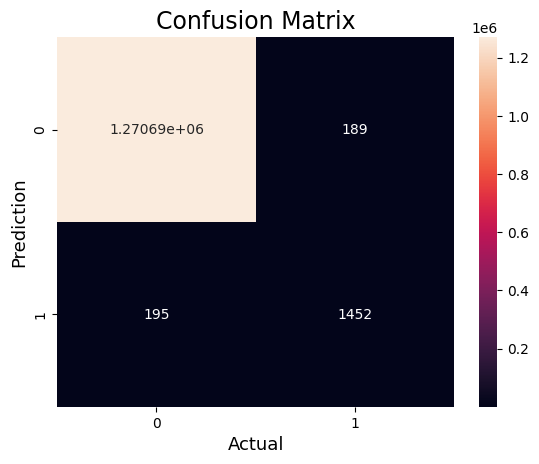

In [23]:
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier(n_estimators=5)
ran.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [30]:
ran.score(x_test,y_test)


0.9996895932807555

In [31]:
ypred1=ran.predict(x_test)
print(ypred1)

[0 0 0 ... 0 0 0]


In [32]:
from sklearn.metrics import confusion_matrix

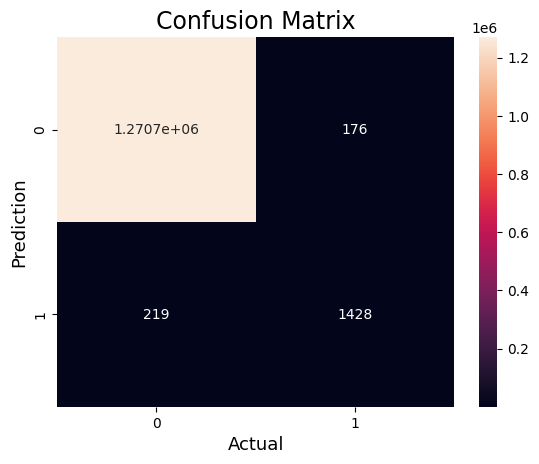

In [33]:
cm1 = confusion_matrix(y_test,ypred1)
 
#Plot the confusion matrix.
sns.heatmap(cm1,
            annot=True,
            fmt='g',)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

1. Data cleaning including missing values, outliers and multi-collinearity
   here we checked for missing values, duplicte values, outliers and removed the independent variables which        were showing multi-collinearity.
   
2. Describe your fraud detection model in elaboration.
   for the fraud detection i have used two models desicion tree and random forest classification for                classification of whether given transaction is fraud or not 0 represents no fraud and 1 shows
   fraud transaction. firstly we imported model from sklearn then first fit the model by providing x train and y    train data. after fitting model we predicted and checked its accuracy by checking it on x test data.
   
3. How did you select variables to be included in the model?
   selecting independent variables are quite brainstorming work for this we have to closely undertand the           problem statement and the dataset provided to separate relevent columns. like in this case nameOrig &            newbalanceOrig were not required so i removed it firstly,in isFlaggedFraud most of the values were 0 means       no, so it was not contributing so much removed this column.
   
4. Demonstrate the performance of the model by using best set of tools.
   performance is demonstrated by confusion matrix,accuracy score and classification report is checked.
   
5. What are the key factors that predict fraudulent customer?
   type of transaction, before and after balance of transaction are some key factors to predict fraudulent.
   
6. Do these factors make sense? If yes, How? If not, How not?
   yes,these factors make sense because by observing only these factors we can analyze whether the transation is    fraudulentor not. most of fraud was in cashout and there was no fraudulent in cash transactions.
   
7. What kind of prevention should be adopted while company update its infrastructure?
   to minimize fraudlent 1.real time monitoring 2. use of machine learning and AI 3.regular security checks
   incident response plan should be ready 5.increase customer awareness  6.design secure and robust technical       infrastructure
      
8. Assuming these actions have been implemented, how would you determine if they work?
   1.by calculateing no. of fraudulents 2.taking customers feedback 3.customers satisfaction ratings 4.             fraudulent tracking 5.reguler reporting 6.by reguler assesments
    